### Principal component analysis on Fashion MNIST

The Fashion MNIST dataset is widely used as a replacement of the MNIST dataset. Is similar in size and shapes, and it also contains 10 categories.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Plotting
import matplotlib.pyplot as plt

# Interactive plots
# !pip install ipykernel
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager
# !jupyter labextension install jupyter-matplotlib
%matplotlib widget

#### Load the dataset providers

In [2]:
!pip install torchvision
!pip install torch

In [3]:
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
import torch

In [4]:
all_transforms = transforms.Compose([
        transforms.Resize(32),
        transforms.ToTensor(),
    ])

dataset = FashionMNIST('../fashion_data', train=True, download=True, transform=all_transforms)

In [5]:
len(dataset)

60000

In [6]:
dataset[1999]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 8)

### A utility function to sample and plot the data

In [7]:
def sample(dataset: torch.utils.data.Dataset) -> None:
    mapping = {
        0: "T-shirt/top",
        1: "Trouser",
        2: "Pullover",
        3: "Dress",
        4: "Coat",
        5: "Sandal",
        6: "Shirt",
        7: "Sneaker",
        8: "Bag",
        9: "Ankle boot"
    }
    
    random_samples_indexes = np.random.randint(len(dataset) - 1, size=9)
    samples = np.array([dataset[i] for i in random_samples_indexes])
    fig, axs = plt.subplots(3, 3)
    
    # Get samples individually and plot them
    for i in range(3):
        for j in range(3):
            axs[i, j].imshow(samples[i + j][0].squeeze(0).numpy(), cmap='gray')
            axs[i, j].set_title(mapping[samples[i + j][1]])
            axs[i, j].label_outer()
    
    plt.show()

C:\Users\Popescu Andrei\AppData\Local\Temp\ipykernel_5256\660491476.py:16: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  samples = np.array([dataset[i] for i in random_samples_indexes])
C:\Users\Popescu Andrei\AppData\Local\Temp\ipykernel_5256\660491476.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  samples = np.array([dataset[i] for i in random_samples_indexe

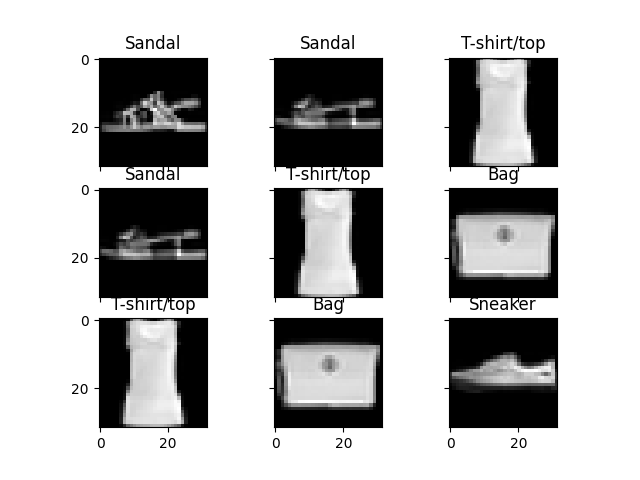

In [8]:
sample(dataset=dataset)

### Experiment with principal components

In [9]:
def get_components(dataset: torch.utils.data.Dataset, n_components: int = 2) -> None:
    # Extract only one category from the dataset
    # I.e:2: "Pullover"
    dataset = [
        dataset[i] for i in range(len(dataset)) if dataset[i][1] == 2
    ]
    
    # Remove half 
    dataset = dataset[:len(dataset) // 2]
    print("Total number of samples: {}".format(len(dataset)))
    
    # Convert to linear
    dataset = [
        dataset[i][0].squeeze(0).reshape(-1, 1).squeeze(1).numpy() for i in range(len(dataset))
    ]
    
    print(dataset[0].shape)
    
    # Normalize the dataset
    scaler = StandardScaler()
    scaler.fit(dataset)
    
    # Get principal components
    pca = PCA(n_components=n_components)
    dataset = pca.fit_transform(dataset)
    print("Variance ratio: {}".format(pca.explained_variance_ratio_))
    print("Singular values: {}".format(pca.singular_values_))
    
    # Plot the new distribution
    if n_components == 2:
        fig, axs = plt.subplots(figsize=(7,5))
        axs.scatter(
            x=[dataset[i][0] for i in range(len(dataset))],
            y=[dataset[i][1] for i in range(len(dataset))],
            c="red",
            alpha=0.3
        )
        plt.show()
    else:
        fig = plt.figure(figsize=(7,5))
        ax = Axes3D(fig)
        ax.scatter(
            xs=[dataset[i][0] for i in range(len(dataset))],
            ys=[dataset[i][1] for i in range(len(dataset))],
            zs=[dataset[i][2] for i in range(len(dataset))],
            c='green',
            alpha=0.4
        )
        plt.show()

Total number of samples: 3000
(1024,)
Variance ratio: [0.46286955 0.11411234]
Singular values: [272.17773657 135.14176985]


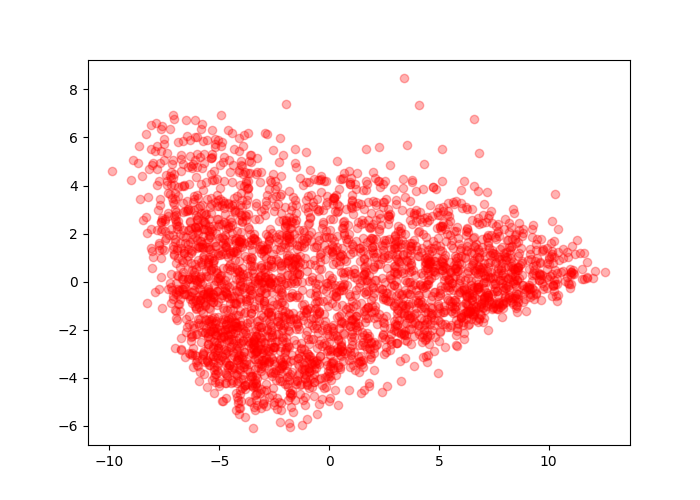

In [10]:
get_components(dataset=dataset)

Total number of samples: 3000
(1024,)
Variance ratio: [0.46286955 0.11411234 0.07848464]
Singular values: [272.17773657 135.14176985 112.07677783]


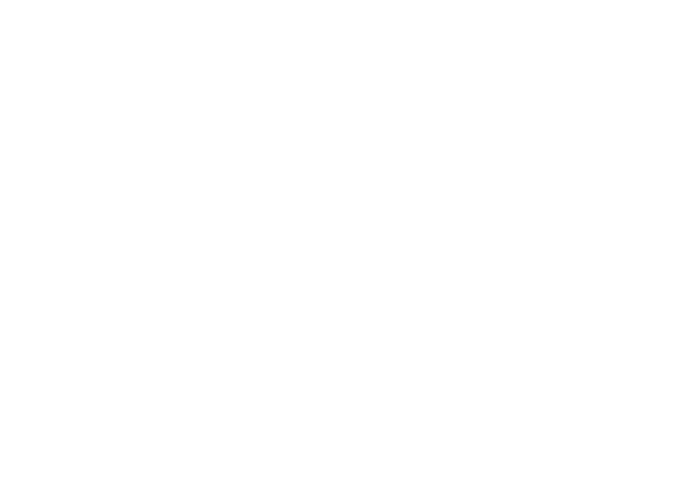

In [11]:
get_components(dataset=dataset, n_components=3)